## Exercise in Photogrammetry I
## **Ex.4 : Binary Images**
### Points: 30

## A. Binary Images and Connected Components *(18 points)*

In this task you will learn how to **convert grayscale** images to **binary** images by applying a certain **thresold**. Finally, based on the binary image we can **identify** which **components** are connected to compute the **number of objects** in the image.

**Tasks:**
1. Load the grayscale image ```shapes.png``` from disk and print its minimum and maximum value. Finally, visualize the grayscale image. *(0.5 points)*
2. Convert the grayscale image to a binary image by applying a threshold of $T=100$. Make sure that all pixels > T have an intensity value of 1 (foreground) and all other pixels have an intensity value of 0 (background). Print the minimum and maximum value of your converted image. Finally, visualize the binary image. *(1.5 points)*
3. In the lecture you discussed two algorithms to identify connected components in a binary image. Implement the *Connected Components for Grids* algorithm and apply it to the previous defined binary image by following each step outlined below:
    - Write a function called ```connected_components(binary_img, neighborhood)``` which computes the *components image* for either *N4 neighborhood* or *N8 neighborhood* **but** does not apply the *equivalence graph* (see *Algorithm 1 in lecture*). Do not use any external python functions which compute the *components image* for you.  *(8 points)*
      <br> **Hint:** Write functions to get the *N4* and *N8 neighborhood* since this operation will be used in other tasks as well
      
    - Apply your function to the binary image and visualize your result for *N4 neighborhood* and *N8 neighborhood*. *(2 points)*
    - Apply the *equivalence graph* to the *components image* and visualize your result for *N4 neighborhood* and *N8 neighborhood*. *(4 points)*
    - Finally, print the number of components in the binary image for *N4 neighborhood* and *N8 neighborhood*. If there is any difference explain why this is the case. *(2 points)*

In [1]:
# Import all required modules
import numpy as np 
import matplotlib.pyplot as plt
import imageio

%matplotlib inline

### A1

In [2]:
# Load the grayscale image
gray_image = imageio.imread('images/shapes.png')

In [3]:
# Print the minimum and maximum value of the grayscale image
print(gray_image.shape)
print(np.amin(gray_image))
print(np.amax(gray_image))

(64, 64)
0
180


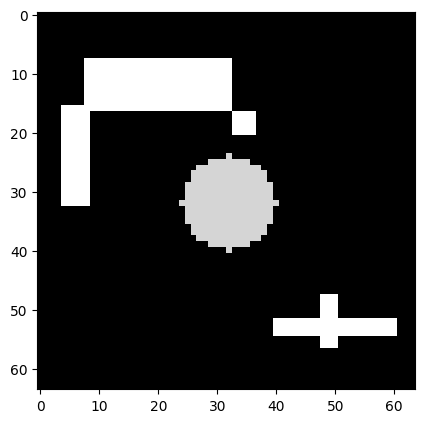

In [4]:
# Visualize the grayscale image
plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(gray_image, cmap='gray')

### A2

In [5]:
# Convert the grayscale image to a binary image {0,1}
gray_image[gray_image > 100] = 1

In [6]:
# Print the minimum and maximum value of the binary image
print(np.amin(gray_image))
print(np.amax(gray_image))

0
1


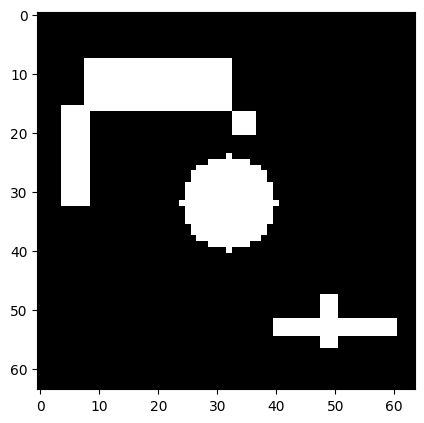

In [7]:
# Visualize the binary image
plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(gray_image, cmap='gray')

### A3

In [8]:
# Write a function called connected_components(binary_img, neighborhood)

# I implemented 2 function (one is brushfire and the another is upgrade version), both are support N4 and N8 neighborhood

# SOME HELPER FUNCTION
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

def reduce_equivalence_graph(E, A):
    replace = False
    rm_item = None
    new_item = None
    for item in E:
        if set(item).intersection(set(A)):
            replace = True
            rm_item = item
            new_item = tuple(set(item).union(set(A)))
    if replace:
        # TODO: WARNING ABOUT THE ORDER OF THESE 2 FUNCTION !!!
        E.remove(rm_item)
        E.add(new_item)
    else:
        E.add(tuple(A))

def connected_components_1(binary_img, neighborhood):
    """
    .----> j
    |
    |
    v i
    This is the Brushfire version
    Parameters
    ----------
    binary_img (np.ndarray): 2D binary images (0, 1)
    neighborhood (str): N4 or N8

    Returns
    -------
    k: array label for given binary image

    """
    K = 0
    N4_idx = [(0, -1), (-1, 0), (0, 1), (1, 0)]
    N8_idx = [(0, -1), (-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1)]

    # To avoid the numerical, then we extend the binary_img by padding 0 around it
    binary_img = np.pad(binary_img, 1, pad_with, padder=0)
    k = np.zeros_like(binary_img, dtype=np.uint8)

    nr, nc = binary_img.shape
    if neighborhood == "N4":
        N = N4_idx
    elif neighborhood == "N8":
        N = N8_idx
    else:
        raise NotImplementedError

    # 1. Find (i, j) | b(i, j) = 1, k(i + 1, j + 1) = 0
    for i in range(1, nr - 1):
        for j in range(1, nc - 1):
            if binary_img[i, j] == 1 and k[i, j] == 0:
                S = [(i, j)]
                K += 1
                k[i, j] = K
                while len(S) != 0:
                    curr_idx = S.pop()    # Index in binary image
                    for idx in N:
                        if binary_img[curr_idx[0] + idx[0], curr_idx[1] + idx[1]] == 1 and k[curr_idx[0] + idx[0], curr_idx[1] + idx[1]] == 0:
                            k[curr_idx[0] + idx[0], curr_idx[1] + idx[1]] = K
                            S.append((curr_idx[0] + idx[0], curr_idx[1] + idx[1]))
    return k[1:-1, 1:-1]

def connected_components(binary_img, neighborhood):
    """

    Parameters
    ----------
    binary_img (np.ndarray): 2D binary images (0, 1)
    neighborhood (str): N4 or N8

    Returns
    -------

    """
    K = 0
    N4_idx = [(0, -1), (-1, 0)]
    N8_idx = [(0, -1), (-1, -1), (-1, 0), (-1, 1)]
    binary_img = np.pad(binary_img, 1, pad_with, padder=0)
    k = np.zeros_like(binary_img, dtype=np.uint8)
    nr, nc = binary_img.shape
    E = set()  # Equivalent table
    if neighborhood == "N4":
        N = N4_idx
    elif neighborhood == "N8":
        N = N8_idx
    else:
        raise NotImplementedError

    for i in range(1, nr - 1):
        for j in range(1, nc - 1):
            if binary_img[i, j] == 1:
                # Search all value
                A = set()
                for idx in N:
                    # A contains labels value of neighborhood (i, j)
                    if k[i + idx[0], j + idx[1]] != 0:
                        A.add(k[i + idx[0], j + idx[1]])
                A = sorted(A)   # Sort
                if len(A) == 0:
                    # All neighbor not labelled, then assign a new label
                    K += 1
                    k[i, j] = K
                elif len(A) >= 1:
                    # Contains the labeled neighbor
                    # Copy the label, ex I copy the MIN label
                    k[i, j] = A[0]
                    # List is not hashable, so add tuple to set instead
                    # Before append, I should merge the new A with the previous one in E which has the item
                    reduce_equivalence_graph(E, A)
    return k[1:-1, 1:-1], E

In [9]:
# Compute the components image with N4 Neighborhood and visualize your result
CI_N4_Brushfire = connected_components_1(gray_image, "N4")
CI_N4_Upgrade, E_N4 = connected_components(gray_image, "N4")

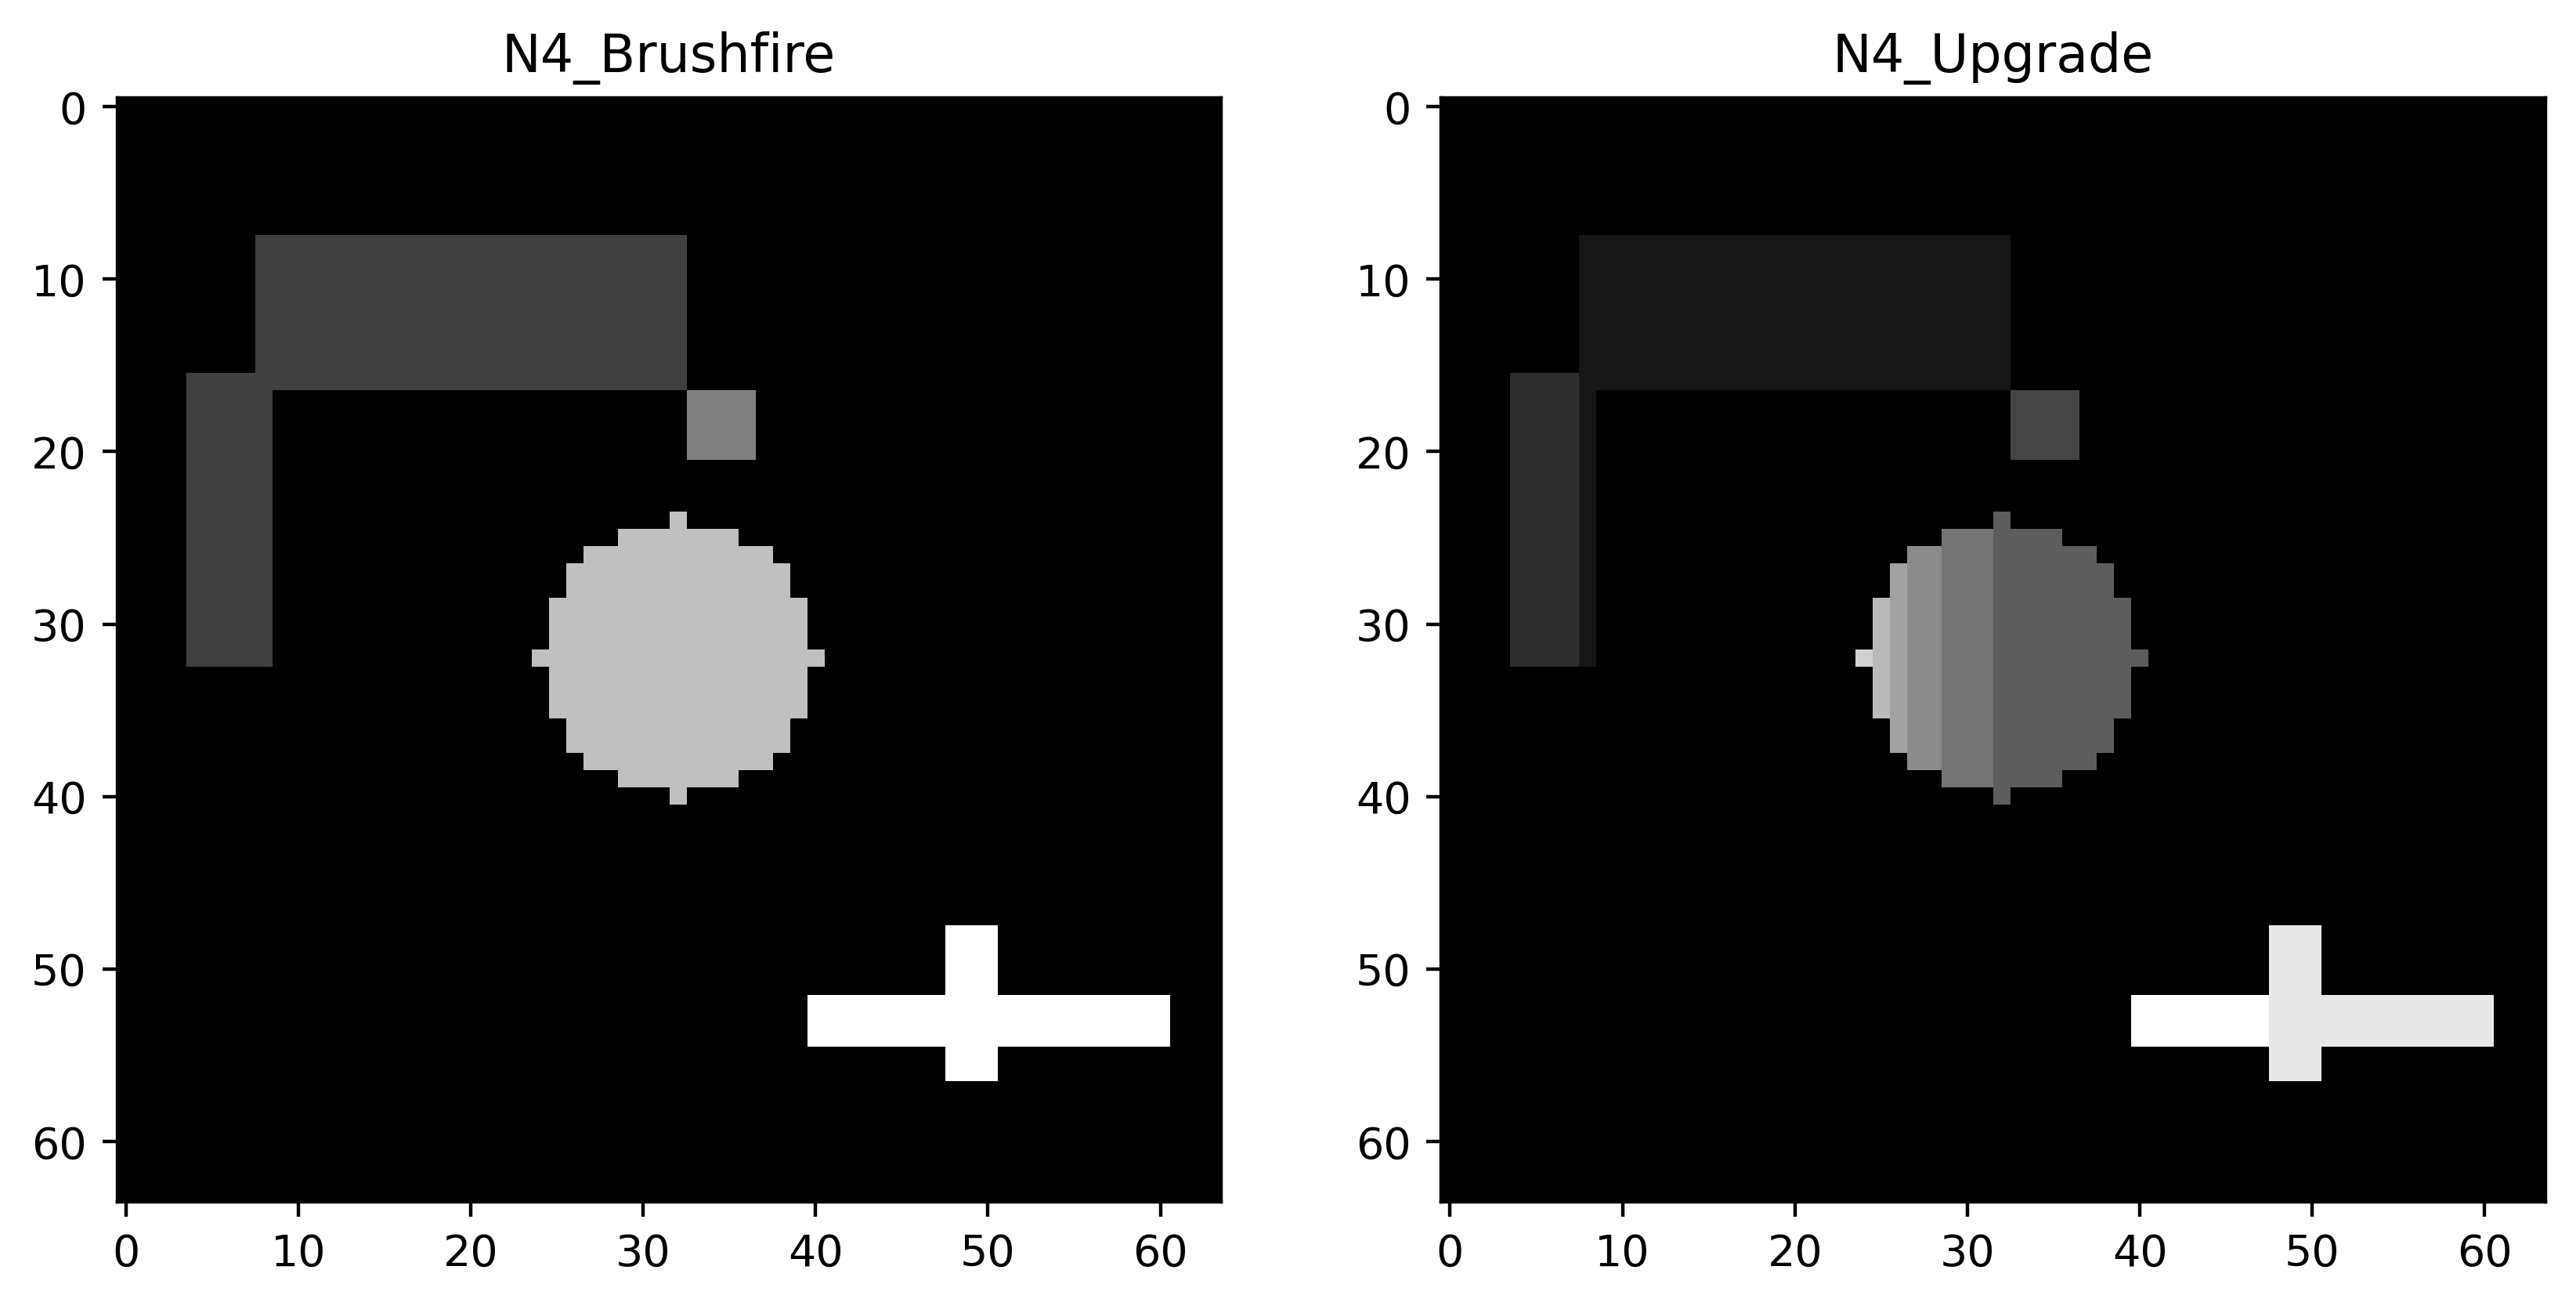

In [10]:
# Visualize side by side
plt.figure(figsize=(10, 10), dpi=400)
plt.subplot(1,2,1)
plt.title('N4_Brushfire')
plt.imshow(CI_N4_Brushfire, cmap="gray")
plt.subplot(1,2,2)
plt.title('N4_Upgrade')
plt.imshow(CI_N4_Upgrade, cmap="gray")

In [11]:
print(E_N4)

{(1, 2), (10, 11), (4, 5, 6, 7, 8, 9), (3,), (4, 5, 6)}


In [12]:
# Compute the components image with N8 Neighborhood and visualize your result
CI_N8_Brushfire = connected_components_1(gray_image, "N8")
CI_N8_Upgrade, E_N8 = connected_components(gray_image, "N8")

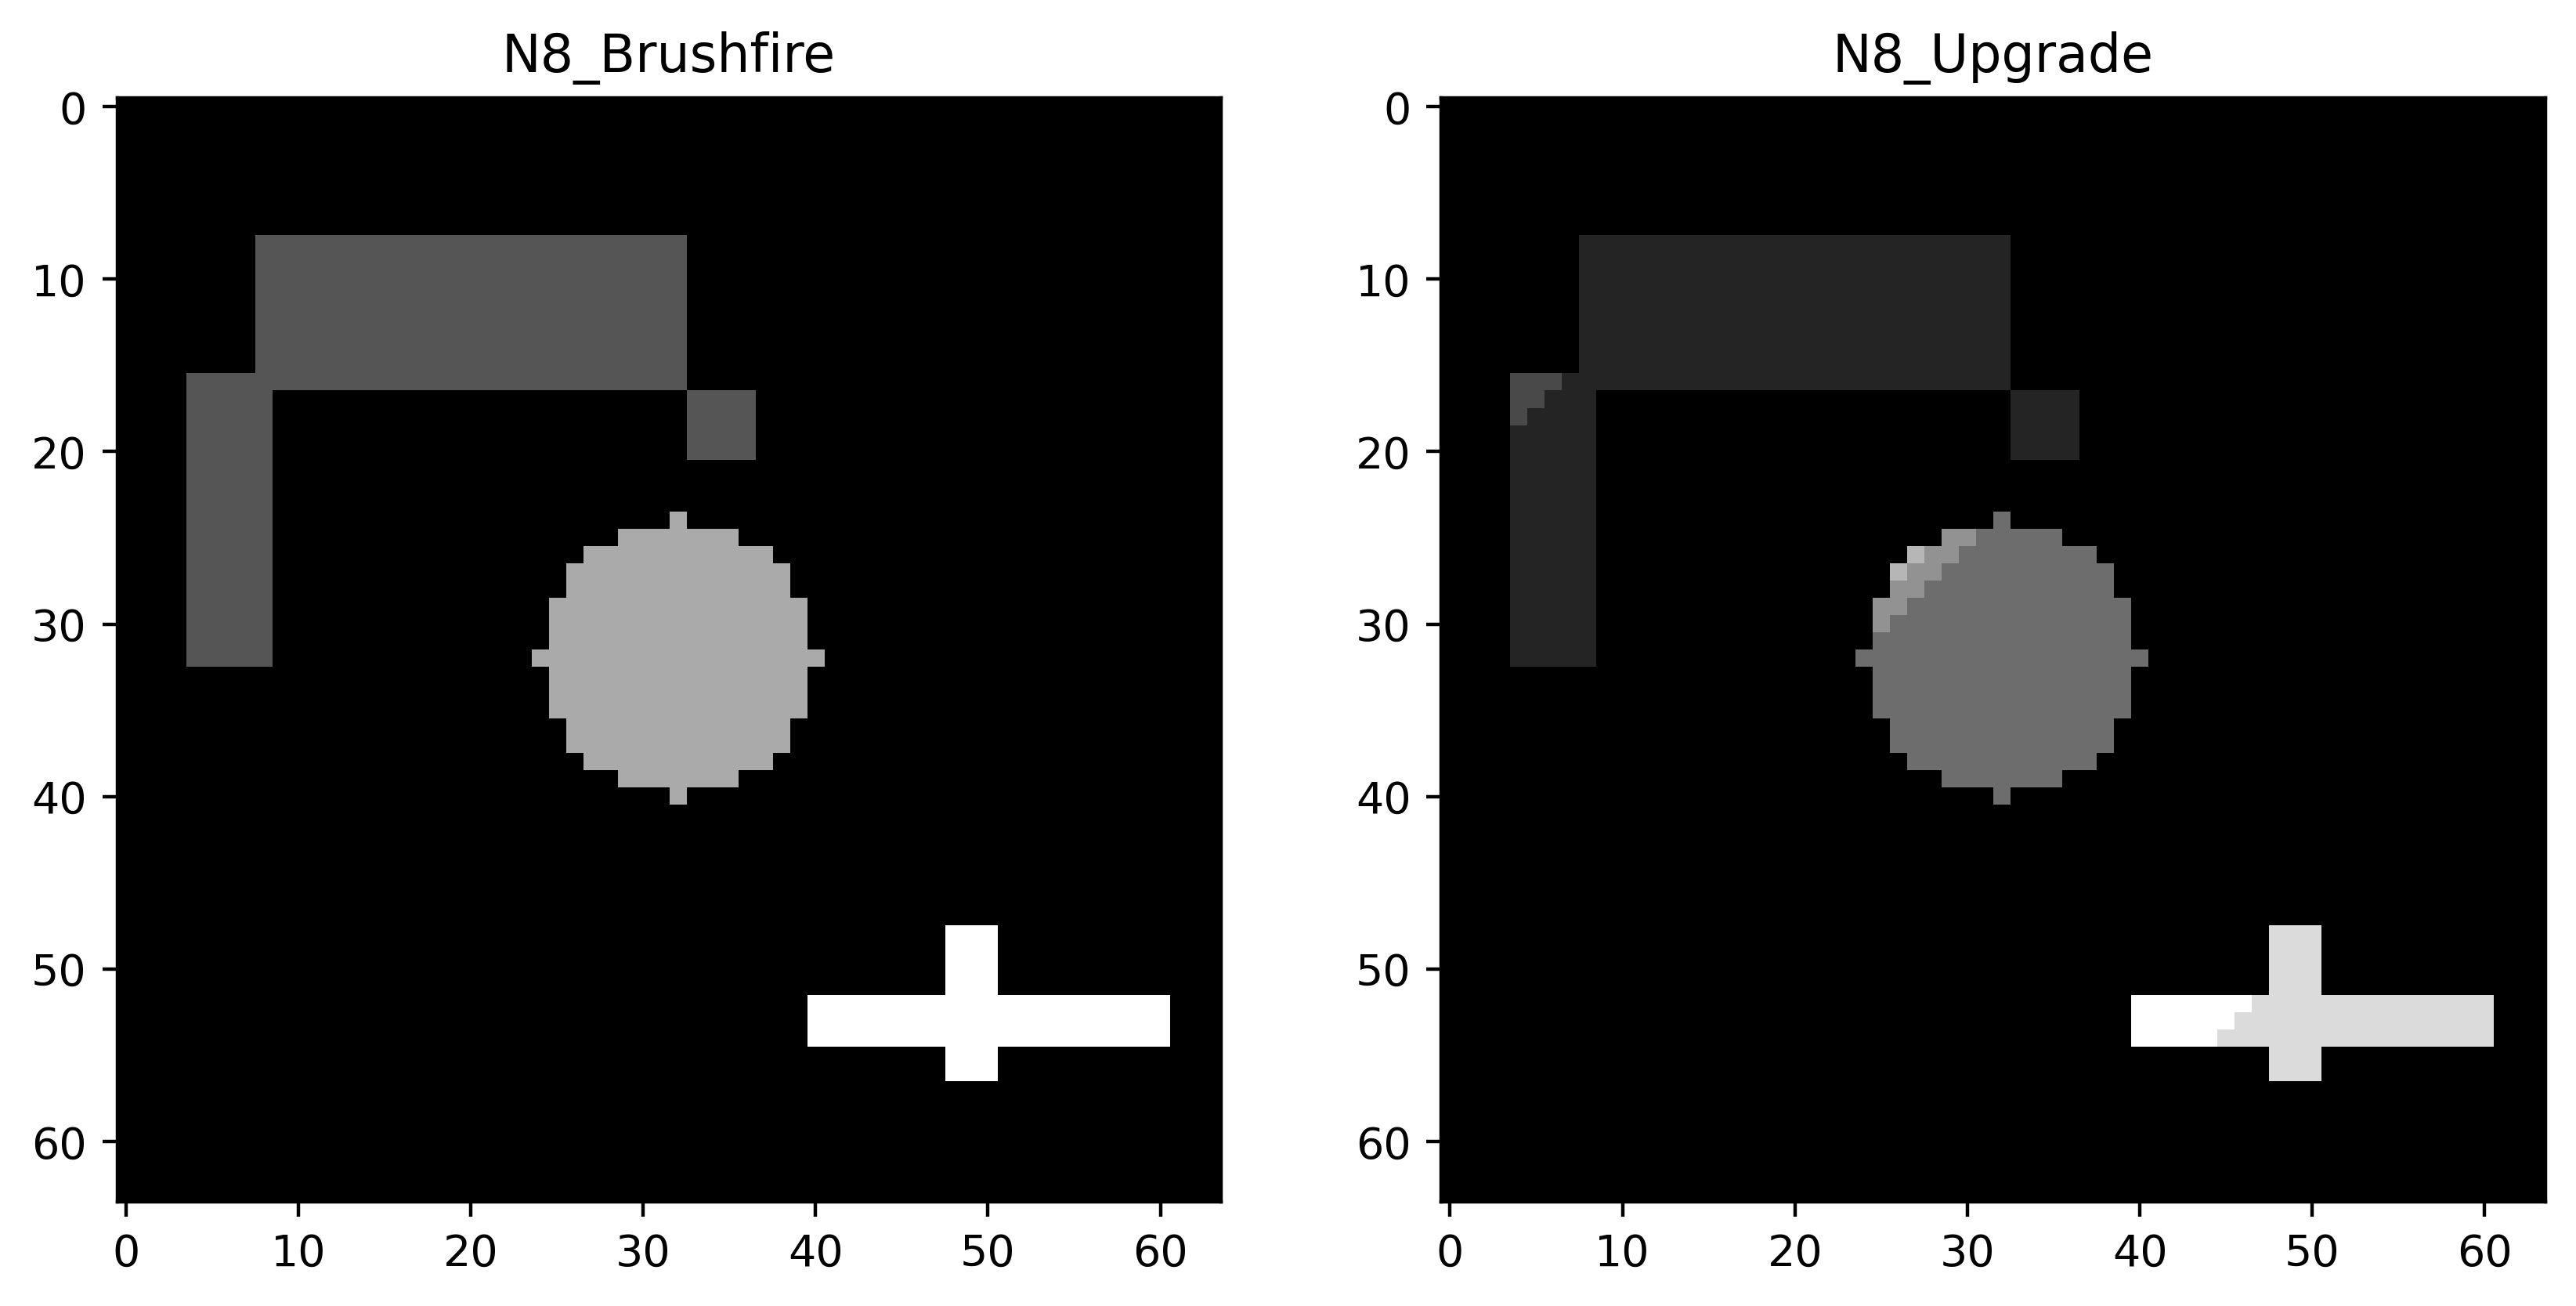

In [13]:
# Visualize side by side
plt.figure(figsize=(10, 10), dpi=400)
plt.subplot(1,2,1)
plt.title('N8_Brushfire')
plt.imshow(CI_N8_Brushfire, cmap="gray")
plt.subplot(1,2,2)
plt.title('N8_Upgrade')
plt.imshow(CI_N8_Upgrade, cmap="gray")

In [14]:
print(E_N8)

{(1, 2), (6, 7), (3, 4, 5)}


In [ ]:
# MAKE ANOTHER FUNCTION LIKE: reduce_equivalence_graph(E, A)

In [ ]:
# Apply the equivalence graph to your components image with N4 Neighborhood and visualize your result


In [ ]:
# Apply the equivalence graph to your components image with N8 Neighborhood and visualize your result


In [ ]:
# Print the number of components in the binary image for N4 Neighborhood and N8 Neighborhood


## B. Morphological Operations and Distance Transformation *(12 points)*

In the lecture your discussed *Morphological Operators* to expand and shrink the foreground of binary images as well as the *Distance Transformation* to compute the distance from any pixel to the border of the components.

**Tasks:**
1. Implement the *Distance Transformation* algorithm and apply it to the previous defined binary image (*A2*) by following each step outlined below:
    - Write a function called ```distance_transformation(binary_img, neighborhood)``` which computes the *distance image* for either *N4 neighborhood* or *N8 neighborhood*. Do not use any external python functions which compute the *distance image* for you. *(5 points)*
    - Apply your function to the binary image and visualize your result for *N4 neighborhood* and *N8 neighborhood*. *(2 points)*
    
2. Apply a *Dilation* to the binary image by using the the ```skimage.morphology``` module ([link](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.dilation))
    - Follow the steps provided by the [example](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.dilation) to dilate the binary image *(2 points)*
    - Visualize your results and describe your observations *(1 point)*
    
3. Finally, apply the *Distance Transformation* with N4 neighborhood to the dilated binary image and visualize your result. *(2 points)*

### B1

In [15]:
# Write a function called distance_transformation(binary_img, neighborhood) to compute the distance matrix
def distance_transformation(binary_img, neighborhood="N4"):
    """

    Parameters
    ----------
    binary_img (np.ndarray): 2D binary images (0, 1)
    neighborhood (str): N4 or N8

    Returns
    -------
    """

    # Iterate 2 pass:
    # 1. Top - down, Left - right
    # 2. Down - top, Right - left
    # Just different with the neighbor, fist for 1st pass, later for 2nd pass

    # Init step
    d = np.pad(binary_img, 1, pad_with, padder=0)  # Use this to avoid numerical indexing
    nr, nc = d.shape

    # d array currently like the binary image mask
    # Perform 1st pass
    for r in range(1, nr - 1):
        for c in range(1, nc - 1):
            if d[r, c] == 1:
                # Compare with the other value
                # Check type
                if neighborhood == "N4":
                    d[r, c] = min(d[r, c-1] + 1, d[r-1, c] + 1)
                elif neighborhood == "N8":
                    d[r, c] = min(d[r, c-1]+1, d[r-1, c]+1, d[r-1, c-1]+1, d[r-1, c+1]+1)
                else:
                    raise NotImplementedError
    # Perform 2nd pass
    for r in range(nr - 1, 0, -1):
        for c in range(nc - 1, 0, -1):
            if d[r, c] != 0:
                if neighborhood == "N4":
                    d[r, c] = min(d[r, c], d[r, c + 1] + 1, d[r + 1, c] + 1)
                elif neighborhood == "N8":
                    d[r, c] = min(d[r, c], d[r, c+1]+1, d[r+1, c]+1, d[r+1, c+1]+1, d[r+1, c-1]+1)
                else:
                    raise NotImplementedError

    return d[1:-1, 1:-1]


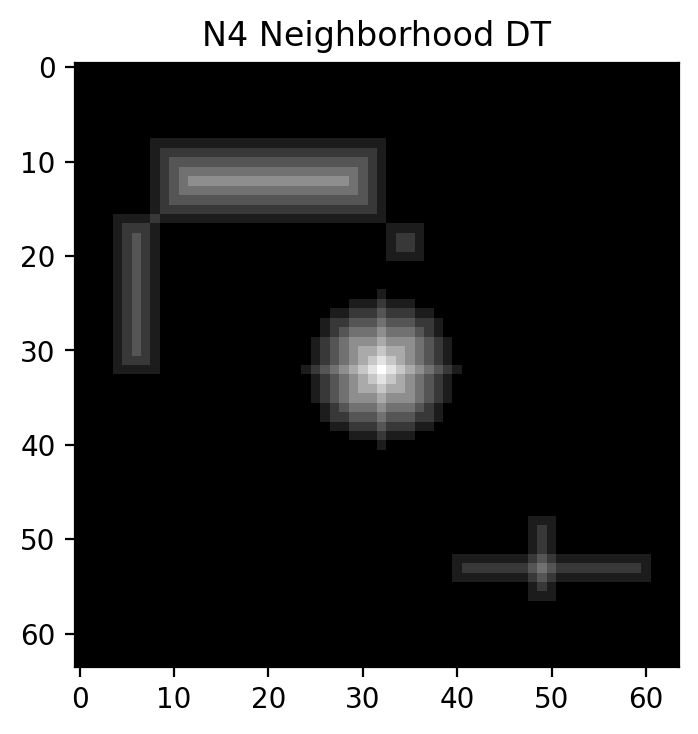

In [37]:
# Compute the distance matrix with N4 Neighborhood and visualize your result
N4_dis = distance_transformation(gray_image, neighborhood="N4")

plt.figure(figsize=(4, 4), dpi=200)
plt.title('N4 Neighborhood DT')
plt.imshow(N4_dis, cmap="gray")

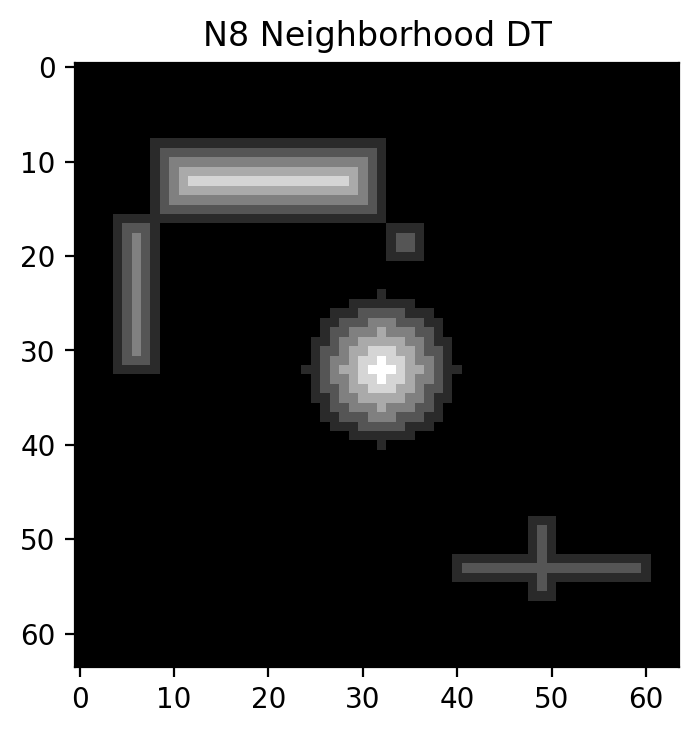

In [20]:
# Compute the distance matrix with N8 Neighborhood and visualize your result
N8_dis = distance_transformation(gray_image, neighborhood="N8")

plt.figure(figsize=(4, 4), dpi=200)
plt.title('N8 Neighborhood DT')
plt.imshow(N8_dis, cmap="gray")

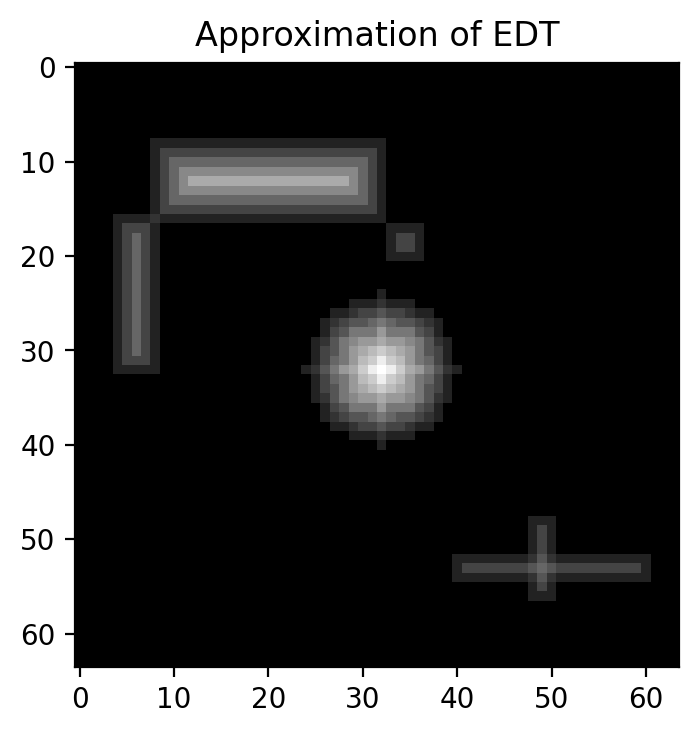

In [23]:
# Approx Euclidean Distance transfrom with N4 and N8 distance, visualize the result
EDT_dis_approx = 1./2 * (N4_dis + N8_dis)

plt.figure(figsize=(4, 4), dpi=200)
plt.title('Approximation of EDT')
plt.imshow(EDT_dis_approx, cmap="gray")

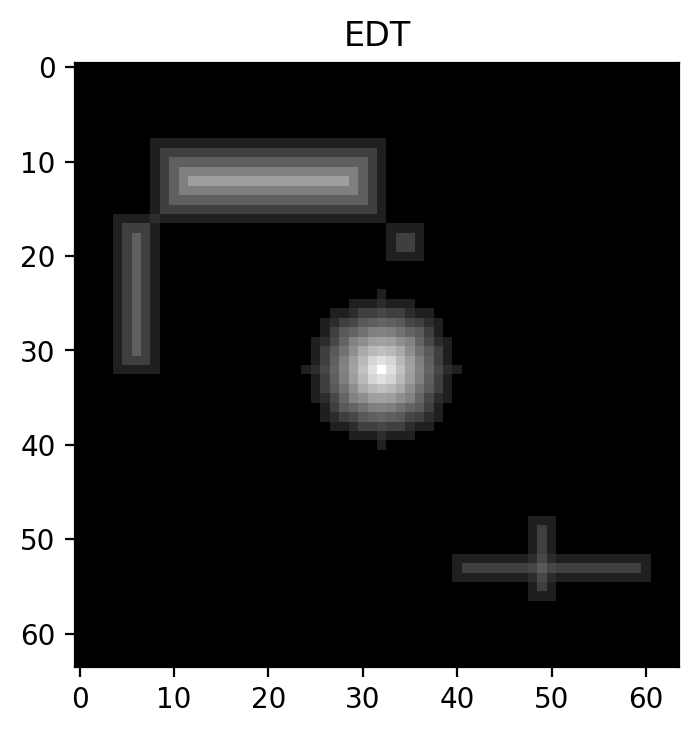

In [24]:
# Use scipy build-in function to compute EDT and visualize
from scipy import ndimage

EDT_dis = ndimage.distance_transform_edt(gray_image) 
plt.figure(figsize=(4, 4), dpi=200)
plt.title('EDT')
plt.imshow(EDT_dis, cmap="gray")

### B2

In [25]:
from skimage.morphology import square, dilation

In [35]:
# Apply a Dilation to the binary image
dilated_image = dilation(gray_image, square(3))

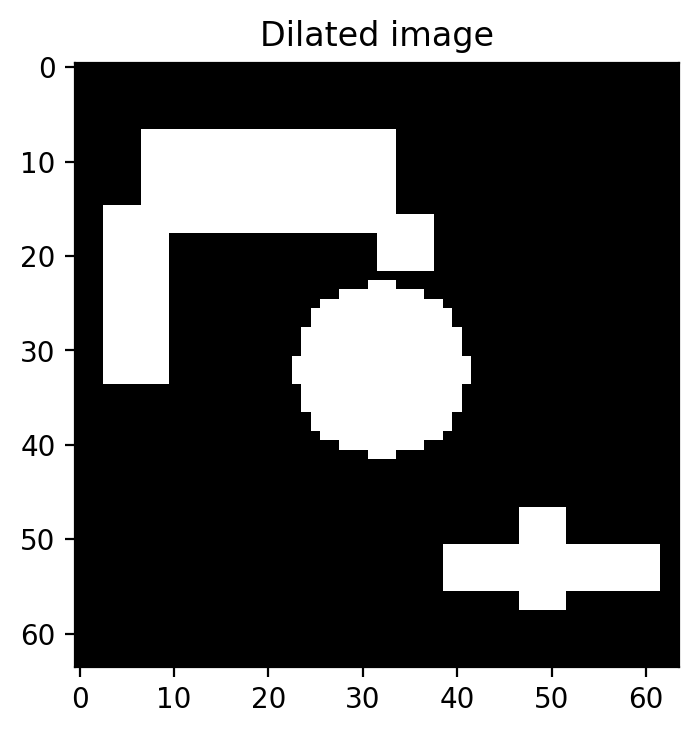

In [36]:
# Visualize the dilated binary image
plt.figure(figsize=(4, 4), dpi=200)
plt.title('Dilated image')
plt.imshow(dilated_image, cmap="gray")

**Explain your observations here**

* Due to the size of square(), the ammound of extended foreground is affected by this. 

* Need to carefully investigate what is square here, by default, the square has shape cross-shape footprint (connectivity=1)

### B3

In [41]:
# Compute the distance matrix with N4 Neighborhood of the dilated binary image
dilated_and_N4_dis = distance_transformation(dilated_image, neighborhood="N4")

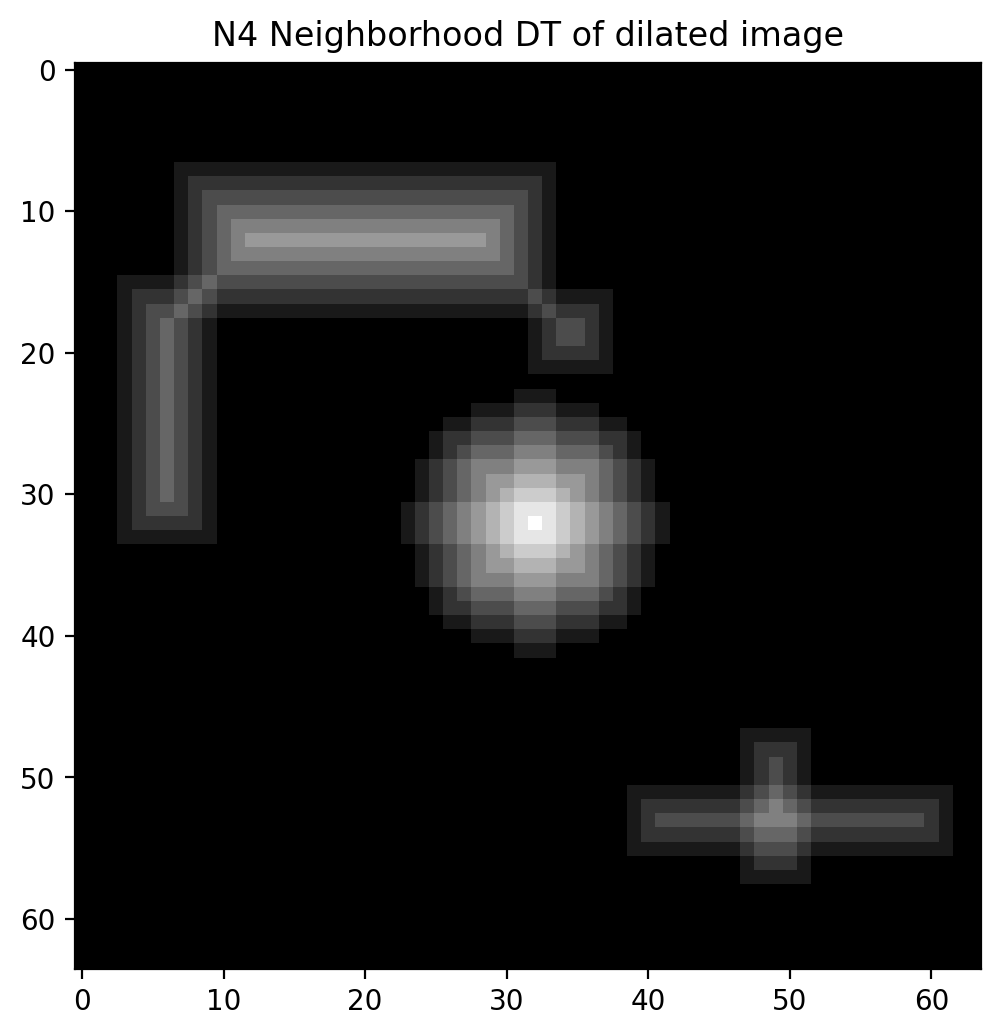

In [40]:
# Visualze the corresponding distance matrix
plt.figure(figsize=(6, 6), dpi=200)
plt.title('N4 Neighborhood DT of dilated image')
plt.imshow(dilated_and_N4_dis, cmap="gray")